In [1]:
##############################################
# Modeling
##############################################
from keras import layers, models
 
def ANN_seq_func(Nin, Nh, Nout):
    model = models.Sequential()
    """ Keras 모델 시작 """

    model.add(layers.Dense(Nh, activation="relu", input_shape=(Nin,)))
    """입력 계층 노드 수 Nin 개,  은닉 계층의 노드 수 Nh 개, 활성함수는 relu  """

    model.add(layers.Dense(Nout, activation="softmax"))
    """출력 노드 수 Nout 개,  활성함수는  softmax (다중 분류문제이므로) """

    model.compile(loss="categorical_crossentropy", optimizer="adam",
                 metrics=["accuracy"])

    """오차(비용) 함수는 categorical_crossentropy, <--(활성함수를 softmax를 사용함으로)
       최적화 함수는 adam 을 사용. SGD(확률적경사하강법) 써도 됨 
    Classification Performance metrics(분류 성능 척도) 는 'accuracy'
    """

    return model

In [2]:
##############################################
# Data
##############################################
from tensorflow.keras import datasets  # mnist
from keras.utils import np_utils  # to_categorical

def Data_func():
    (X_train, y_train), (X_test, y_test) = datasets.mnist.load_data()
    """ 이미지 데이터 X ,  0~9까지 붙인 이름표를 Y   
    70,000개의 데이터 중 60,000개를 학습 데이터로,  10,000개를 테스트 데이터로 읽어옵니다. 
    """

    Y_train = np_utils.to_categorical(y_train)
    Y_test = np_utils.to_categorical(y_test)
    """원-핫 인코딩을 위해 케라스의 np_utils 의 to_categorical() 함수를 사용
     0 ~ 9까지의 정수 값을 갖는 형태가 아닌 0 이나 1로 이뤄진 벡터로 수정 
     만약에 '3' 이라는 숫자이라면 [0, 0, 1, 0, 0, 0, 0, 0, 0]으로 변환 
    """

    L, W, H = X_train.shape 
    print(L, W, H)  #6000 28 28 
    
    X_train = X_train.reshape(-1, W * H)
    X_test = X_test.reshape(-1, W * H)
    """ 행 갯수는 상관없고, 열은 28*28(-> 784 )로 reshape """
 
    X_train = X_train / 255.0
    X_test = X_test / 255.0
    """ 원래 데이터가 0~255 인데 0~1로  변환""" #정규화 

    return (X_train, Y_train), (X_test, Y_test)


60000 28 28
Epoch 1/15
480/480 [==============================] - 2s 2ms/step - loss: 0.6902 - accuracy: 0.8048 - val_loss: 0.2200 - val_accuracy: 0.9379
Epoch 2/15
480/480 [==============================] - 1s 2ms/step - loss: 0.2114 - accuracy: 0.9388 - val_loss: 0.1601 - val_accuracy: 0.9551
Epoch 3/15
480/480 [==============================] - 1s 2ms/step - loss: 0.1498 - accuracy: 0.9585 - val_loss: 0.1345 - val_accuracy: 0.9615
Epoch 4/15
480/480 [==============================] - 1s 2ms/step - loss: 0.1125 - accuracy: 0.9678 - val_loss: 0.1185 - val_accuracy: 0.9657
Epoch 5/15
480/480 [==============================] - 1s 2ms/step - loss: 0.0883 - accuracy: 0.9750 - val_loss: 0.1076 - val_accuracy: 0.9678
Epoch 6/15
480/480 [==============================] - 1s 2ms/step - loss: 0.0750 - accuracy: 0.9789 - val_loss: 0.0973 - val_accuracy: 0.9716
Epoch 7/15
480/480 [==============================] - 1s 2ms/step - loss: 0.0606 - accuracy: 0.9834 - val_loss: 0.0925 - val_accuracy: 0

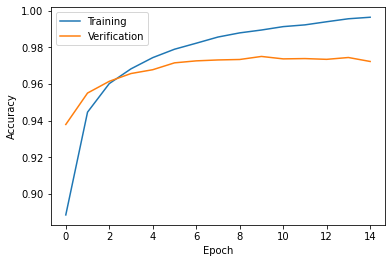

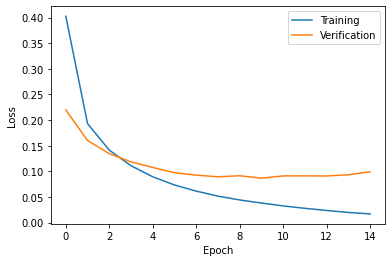

In [4]:
##############################################
# Main   # 분류 ANN 학습 및 성능 분석 
##############################################
import matplotlib.pyplot as plt
%matplotlib inline 

def main():
    Nin = 784
    Nh = 100
    number_of_class = 10
    Nout = number_of_class

    model = ANN_seq_func(Nin, Nh, Nout)
    (X_train, Y_train), (X_test, Y_test) = Data_func()

    ##############################################
    # Training
    ##############################################
    history = model.fit(X_train, Y_train, epochs=15, batch_size=100,\
                       validation_split=0.2)
    """학습 """

    performace_test = model.evaluate(X_test, Y_test, batch_size=100)
    """평가 """
    print('Test Loss and Accuracy ->', performace_test)

    history = history.history
    """정확도 변화 추이 그래프"""
    plt.plot(history["accuracy"])
    plt.plot(history["val_accuracy"])
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Training', 'Verification'], loc=0)
    plt.show()

    """Cost/Loss  변화 추이  그래프"""
    plt.plot(history["loss"])
    plt.plot(history["val_loss"])
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Training', 'Verification'], loc=0)
    plt.show()


if __name__ == '__main__':
    main()
